## Analysis of the top games on the Google Play Store
Main Questions:
- kategori game apa sih yang paling sedikit & banyak di download?
- kategori apa sih yang 60 dan 30 hari kebelakang growth-nya paling besar dan kecil?
- berapa rata-rata avg rating untuk setiap kategori?
- strategi apa yang bisa dilakukan menaikkan rating game?
- kok ada game yang berbayar masuk ke top games? Kalau ada, apa sama kenapa sih?
- apa strategi yang dilakukan tiga game dengan instalasi terbanyak?

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Load and Get to Know About the Data

In [3]:
df = pd.read_csv('android-games.csv')
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


Cek dulu apakah ada data yang null?

In [5]:
df.isna().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

All good, datanya tidak ada yang null, semua kolom juga balance

### Data Cleansing

In [6]:
df['installs'].unique()

array(['500.0 M', '100.0 M', '50.0 M', '10.0 M', '5.0 M', '1.0 M',
       '1000.0 M', '500.0 k', '100.0 k'], dtype=object)

Intinya kode dibawah mengubah tipe data dari bentuk diatas menjadi numerik seperti di tabel bawah. Jaga-jaga, kalau kolom `installs` harus dihitung

In [7]:
# Use regex to strip all .0 from installs, e.g. 100.0 -> 100
df['installs'] = df['installs'].str.replace('\.0', '', regex=True)
# change ' M' to '000000' and ' k' to '000'
df['installs'] = df['installs'].str.replace(r' M', '000')
df['installs'] = df['installs'].str.replace(r' k', '')
# change to numeric
df['installs'] = df['installs'].astype(int)

## Data Exploration

Karena pertanyaan-pertanyaan diatas hampir semua berhubungan dengan kategori, lebih baik kalau buat visualisasi awalnya terlebih dahulu

<AxesSubplot: >

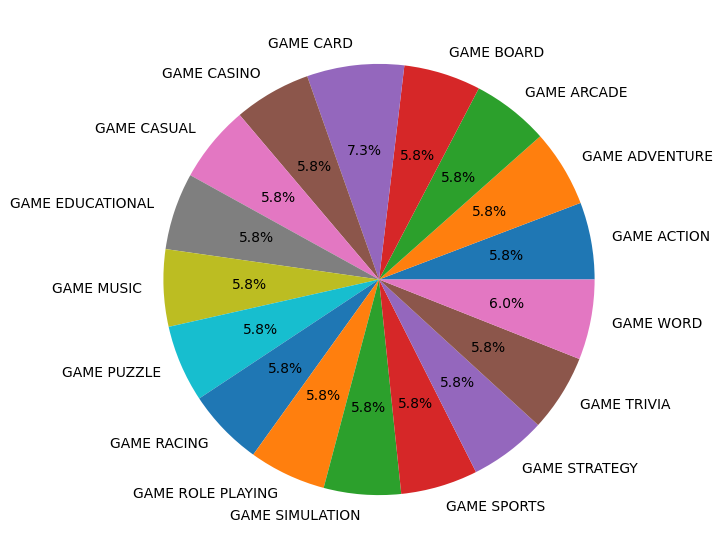

In [8]:
categories = df.groupby('category').size()
categories.plot.pie(figsize=(7,7), autopct='%1.1f%%')

Untuk persebaran kategorinya bisa dibilang merata untuk semua kategori, artinya semua kategori punya marketnya tersendiri dengan rata-rata persentasenya 5.8%. Hanya game card dan game word yang persentasenya diatas 5.8%, yakni 7.3% dan 6%

Selanjutnya, kita buat matriks korelasi untuk mendapat informasi awal dari data yang ingin diolah

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,rank,total ratings,installs,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
rank,1.000000,-0.308713,-0.328320,-0.067559,-0.035255,-0.008887,-0.011909,-0.302332,-0.365613,-0.353674,-0.312906,-0.248429,0.023700
total ratings,-0.308713,1.000000,0.676523,0.044468,-0.008948,-0.004486,0.010421,0.998430,0.946306,0.975848,0.970815,0.937750,-0.005027
installs,-0.328320,0.676523,1.000000,0.042961,-0.013886,-0.004290,-0.020964,0.674925,0.719083,0.723378,0.669550,0.549536,-0.028725
average rating,-0.067559,0.044468,0.042961,1.000000,-0.017330,0.001708,0.016086,0.054079,0.057673,0.026804,-0.000597,-0.015135,0.020139
growth (30 days),-0.035255,-0.008948,-0.013886,-0.017330,1.000000,-0.002565,-0.001103,-0.008775,-0.011146,-0.009878,-0.009431,-0.006845,-0.000790
growth (60 days),-0.008887,-0.004486,-0.004290,0.001708,-0.002565,1.000000,-0.002719,-0.003665,-0.008882,-0.008115,-0.006027,-0.004139,-0.003391
price,-0.011909,0.010421,-0.020964,0.016086,-0.001103,-0.002719,1.000000,0.013369,0.004262,0.000552,0.000702,0.000902,0.798750
5 star ratings,-0.302332,0.998430,0.674925,0.054079,-0.008775,-0.003665,0.013369,1.000000,0.943246,0.967436,0.958578,0.925411,-0.003117
4 star ratings,-0.365613,0.946306,0.719083,0.057673,-0.011146,-0.008882,0.004262,0.943246,1.000000,0.976459,0.902220,0.808800,-0.010217
3 star ratings,-0.353674,0.975848,0.723378,0.026804,-0.009878,-0.008115,0.000552,0.967436,0.976459,1.000000,0.969186,0.900066,-0.012746


Menarik, ada banyak insight yang bisa didapatkan dari matriks korelasi diatas

### Kategori Game Apa Sih yang Paling Sedikit & Banyak di Download?

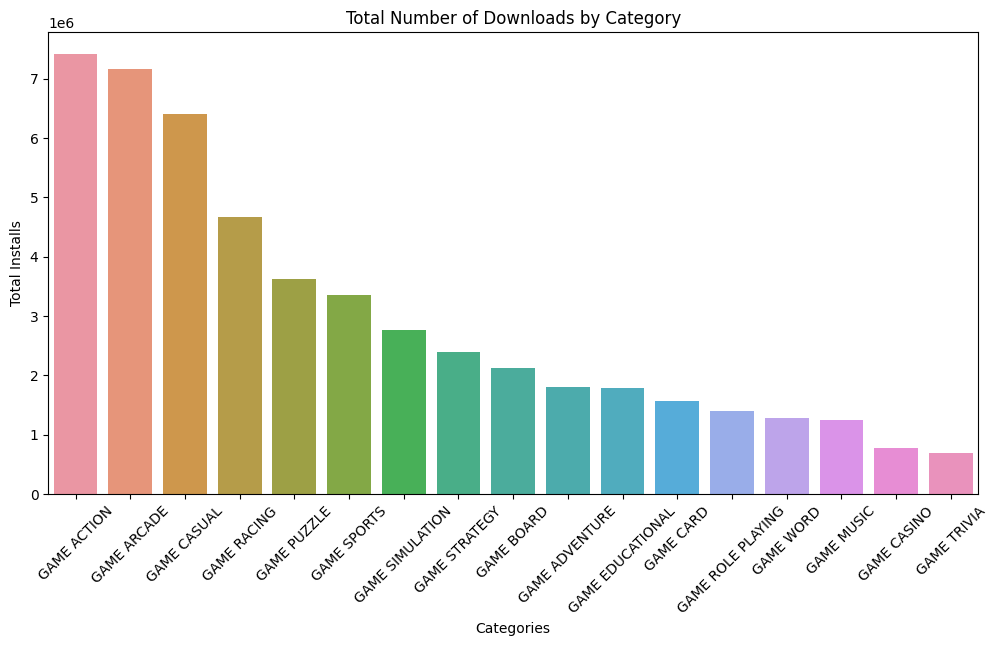

In [10]:
# create a new dataframe with the total number of dowloads for each category
downloads_by_category = df.groupby('category')['installs'].sum().reset_index()

# sort the dataframe by the number of downloads in descending order
downloads_by_category = downloads_by_category.sort_values('installs', ascending=False)

# create a line plot of the number of downloads for each category
plt.figure(figsize=(12,6))
sns.barplot(x='category', y='installs', data=downloads_by_category)
plt.xticks(rotation=45)
plt.xlabel('Categories')
plt.ylabel('Total Installs')
plt.title('Total Number of Downloads by Category')
plt.show()

In [11]:
downloads_by_category

,category,installs
0,GAME ACTION,7410000
2,GAME ARCADE,7161000
6,GAME CASUAL,6397000
10,GAME RACING,4675000
9,GAME PUZZLE,3621000
13,GAME SPORTS,3361000
12,GAME SIMULATION,2771000
14,GAME STRATEGY,2391000
3,GAME BOARD,2123000
1,GAME ADVENTURE,1803000


Ternyata game action didownload paling banyak! Lebih dari 7 juta kali didownload, posisi kedua dan ketiga berturut-turut ditempati game arcade dan game casual.
Lalu gimana dengan tiga kategori terbawah yang paling sedikit di download? Ternyata game musik, kasino, dan trivia menempati posisi tersebut dengan jumlah download masing-masing 1.281 juta, 771 ribu, dan 690 ribu

### Kategori Apa Sih yang 60 dan 30 Hari Ke Belakang Growth-nya Paling Besar dan Kecil?

Mari kita cek korelasi dahulu untuk variabel-variabel yang akan kita observasi di bagian ini

In [12]:
df['installs'].corr(df['growth (60 days)'])

-0.00428970776603312

In [13]:
df['growth (30 days)'].corr(df['growth (60 days)'])

-0.002564836091077934

Jadi, bagaimana korelasi antara jumlah download untuk setiap kategori dengan rata-rata growth 60 hari kebelakang? Ternyata skor korelasinya -0.00429, bisa kita simpulkan bahwa growth 60 hari kebelakang tidak ada hubungannya dengan total install. Menarik, salah satu faktornya karena growth itu sangat fluktuatif, tidak bisa diukur hanya 60 hari kebelakang. Bahkan, skor korelasi growth 30 dan 60 hari ke belakang adalah -0.0025 yang menunjukkan bahwa perkembangan game itu sangat cepat berubah.

Sekarang, mari kita plot data perkembangan game berdasarkan kategorinya untuk 30 dan 60 hari kebelakang. Dibawah ini adalah data growth untuk semua game

In [14]:
growth_by_category = df.groupby('category')['growth (30 days)', 'growth (60 days)'].mean().reset_index()
growth_by_category

,category,growth (30 days),growth (60 days)
0,GAME ACTION,18.808000,118.294000
1,GAME ADVENTURE,259.101000,6.084000
2,GAME ARCADE,58.924000,21.970000
3,GAME BOARD,34.445000,587.891000
4,GAME CARD,746.598413,555.337302
5,GAME CASINO,2335.253000,2.193000
6,GAME CASUAL,36.020000,14.812000
7,GAME EDUCATIONAL,102.455000,14.748000
8,GAME MUSIC,24.626000,22.160000
9,GAME PUZZLE,44.362000,12.062000


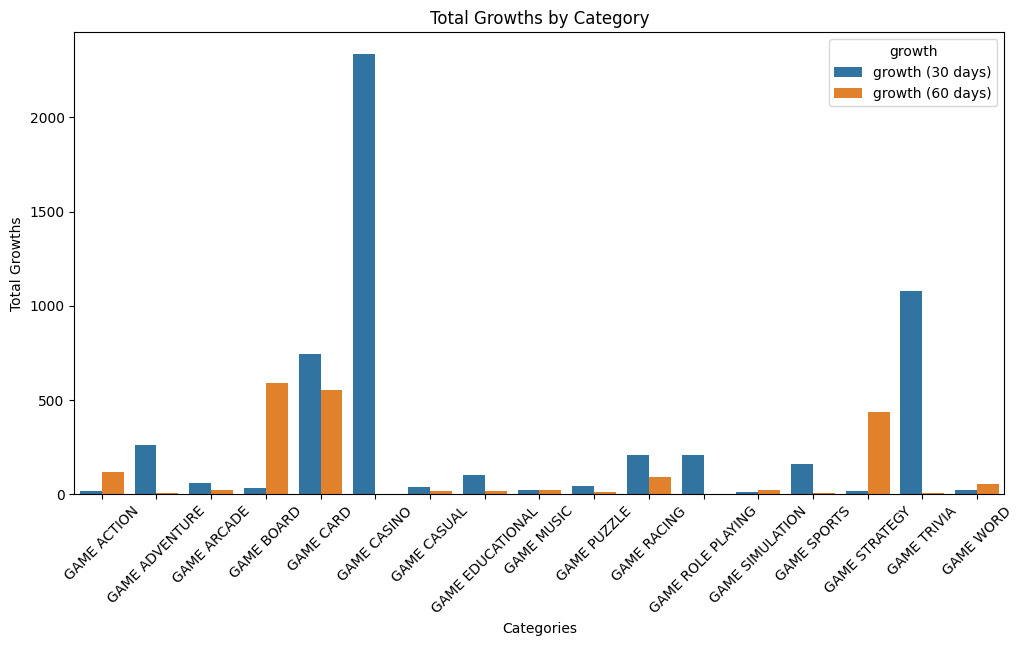

In [15]:
plt.figure(figsize=(12,6))
melted_growth = pd.melt(growth_by_category, id_vars='category', var_name='growth', value_name='total')
sns.barplot(x='category', y='total', hue='growth', data=melted_growth)
plt.xticks(rotation=45)
plt.xlabel('Categories')
plt.ylabel('Total Growths')
plt.title('Total Growths by Category')
plt.show()

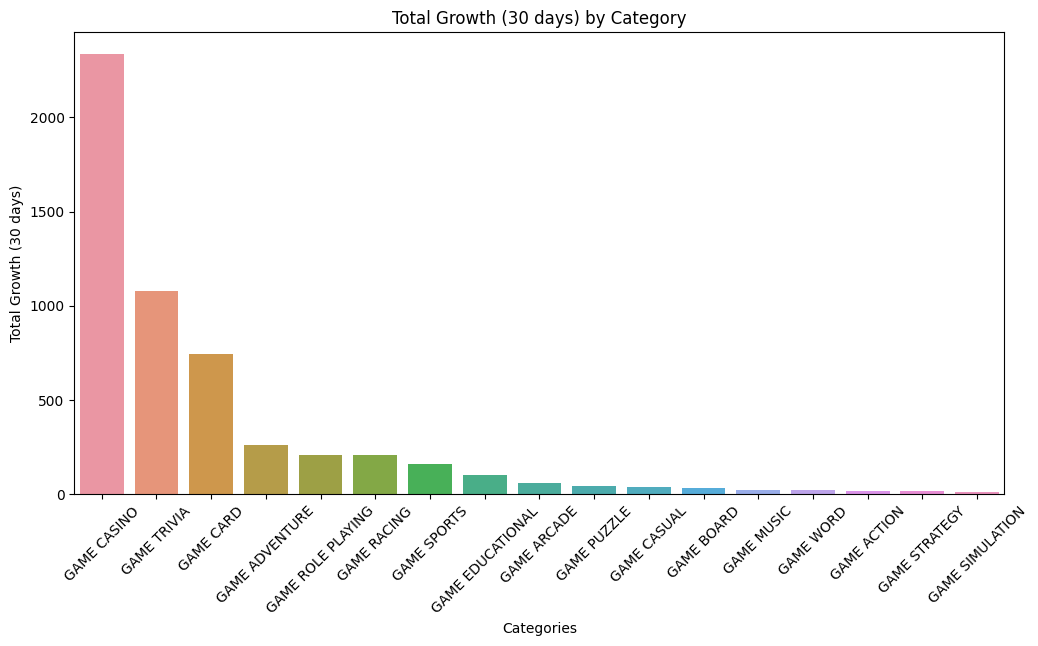

In [16]:
growth_by_category = growth_by_category.sort_values('growth (30 days)', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='category', y='growth (30 days)', data=growth_by_category)
plt.xticks(rotation=45)
plt.xlabel('Categories')
plt.ylabel('Total Growth (30 days)')
plt.title('Total Growth (30 days) by Category')
plt.show()

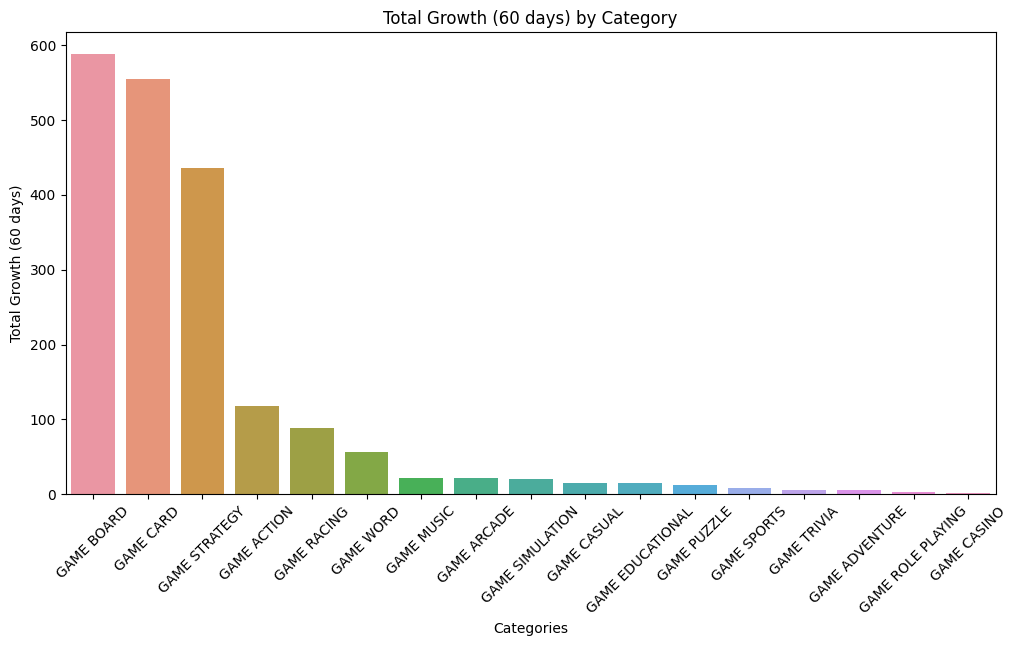

In [17]:
growth_by_category = growth_by_category.sort_values('growth (60 days)', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='category', y='growth (60 days)', data=growth_by_category)
plt.xticks(rotation=45)
plt.xlabel('Categories')
plt.ylabel('Total Growth (60 days)')
plt.title('Total Growth (60 days) by Category')
plt.show()

Terbukti, game casino yang 60 hari lalu berada di posisi terakhir, kini menjadi kategori game dengan pertumbuhan tertinggi dalam 30 hari terakhir. Hal menarik lain yang dapat kita ambil dari data di atas, hanya kategori game card yang posisinya tetap berada di tiga kategori game dengan pertumbuhan terbesar dalam 30 dan 60 hari.

Dilihat dari salah satu grafik diatas ternyata growth 60 harinya sangat jomplang, apakah ada outlier? Mari kita cek

In [18]:
df[df['category'] == 'GAME BOARD'][['title', 'category', 'growth (60 days)']].sort_values('growth (60 days)', ascending=False).head(10)

,title,category,growth (60 days)
364,Carrom King™ - Best Online Carrom Board Pool Game,GAME BOARD,42875.2
374,인생역전윷놀이,GAME BOARD,15483.9
354,Sudoku Free,GAME BOARD,82.3
388,🐍 Snakes and Ladders - Free Board Games 🎲,GAME BOARD,30.6
382,Chess Royale: Play and Learn Free Online,GAME BOARD,21.9
342,Yalla Ludo - Ludo&Domino,GAME BOARD,20.5
390,Onet 3D - Classic Link Puzzle,GAME BOARD,17.2
312,Chess - Play and Learn,GAME BOARD,15.8
362,Tile Master - Classic Triple Match & Puzzle Game,GAME BOARD,13.4
363,Ludo,GAME BOARD,12.8


Benar saja, ada dua game yang pertumbuhannya di atas 15.000. Outlier di atas dapat disebabkan oleh beberapa hal, salah satunya jumlah instalasi game-game tersebut sangat rendah, lalu pengembang game di atas menerapkan strategi pemasaran yang berhasil menarik banyak orang dalam kurun waktu 60 hari. Menurut saya, pertumbuhan maupun total pemasangan untuk kategori game yang masih kecil bukan berarti kategori tersebut harus dihindari. Sebaliknya, ada pasar yang menanti untuk dieksplorasi dengan catatan pengembang game harus melakukan strategi pemasaran yang baik dan membuat game dengan konten yang menarik.

### Berapa Rata-rata Avg Rating Untuk Setiap Kategori?

In [19]:
avg_rating_by_category = df.groupby('category')['average rating'].mean().reset_index().sort_values('average rating', ascending=False)
avg_rating_by_category

,category,average rating
10,GAME RACING,3.960000
5,GAME CASINO,3.950000
6,GAME CASUAL,3.950000
16,GAME WORD,3.942308
12,GAME SIMULATION,3.940000
9,GAME PUZZLE,3.940000
4,GAME CARD,3.936508
3,GAME BOARD,3.930000
13,GAME SPORTS,3.920000
2,GAME ARCADE,3.910000


Sepertinya data di atas tidak perlu digambarkan dalam grafik, karena rata-rata rating untuk semua jenis game hampir sama, yaitu antara 3.80 sampai 3.96. Intinya, game racing mendapat rating tertinggi, sedangkan game music mendapat rating terendah.

Selanjutnya, kita lihat lagi variabel apa saja yang berkorelasi dengan rating, khususnya rating bintang 5.

In [20]:
ratings_cols = ['total ratings', '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings', '1 star ratings']

for col in ratings_cols:
    print(f"{'installs'} vs {col}\t: {df['installs'].corr(df[col])}")

installs vs total ratings	: 0.6765231325182328
installs vs 5 star ratings	: 0.6749245423421765
installs vs 4 star ratings	: 0.7190830513334844
installs vs 3 star ratings	: 0.7233780752574446
installs vs 2 star ratings	: 0.669549921501275
installs vs 1 star ratings	: 0.5495355880273138


Semua hubungan variabel diatas kita dapat simpulkan *moderately correlated*. Satu hal yang perlu digarisbawahi, kita juga harus ingat bahwa jumlah instalasi game mempengaruhi jumlah rating yang diberikan. Mari kita plot dulu Total Ratings vs Star Ratings

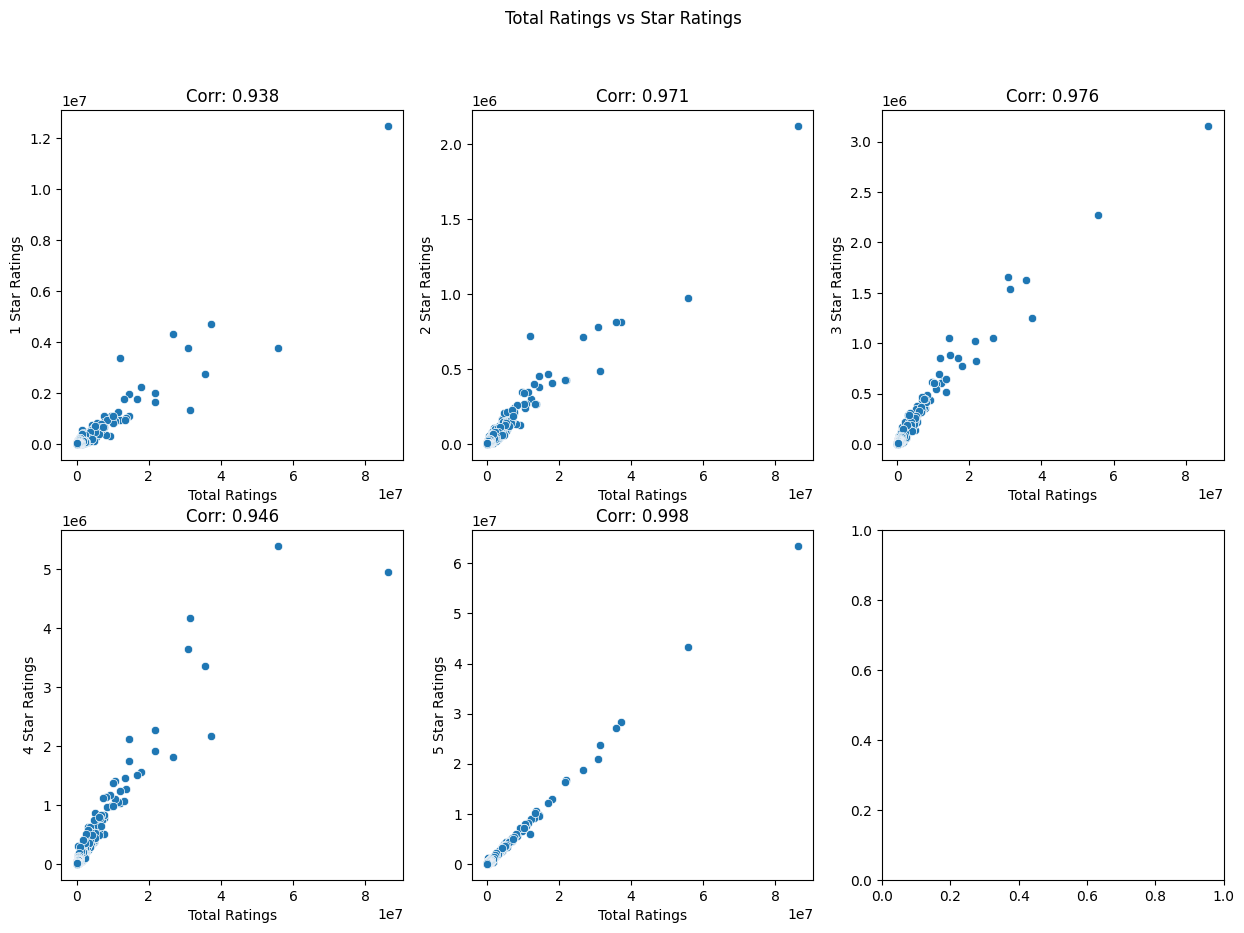

In [21]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
axs = axs.flatten()
for i in range(1, 6):
    ax = axs[i-1]
    sns.scatterplot(x='total ratings', y=f'{i} star ratings', data=df, ax=ax)
    ax.set_title(f"Corr: {df.corr().loc['total ratings',f'{i} star ratings'].round(3)}")
    ax.set_xlabel('Total Ratings')
    ax.set_ylabel(f'{i} Star Ratings')

fig.suptitle('Total Ratings vs Star Ratings')
plt.show()

Informasi yang kita bisa ambil dari plot diatas adalah semakin sering sebuah game didownload, maka semakin banyak juga user yang memberikan review bintang lima. Wajar, salah satu faktornya mungkin karena user merasa puas setelah bermain game tersebut lalu mereka memberikan rating tertinggi.  

Selanjutnya, kita buat persentase untuk semua star rating untuk mengetahui pola apa sih yang dihasilkan, seperti biasa kita akan kelompokkan berdasarkan kategori game-nya

In [22]:
# create a rating percentage column
for i in range(1, 6):
    df[f'{i} star ratings %'] = round(df[f'{i} star ratings'] / df['total ratings'] * 100, 3)

In [23]:
# average rating percentage by category
avg_rating_pct_by_category = df.groupby('category')['1 star ratings %', '2 star ratings %', '3 star ratings %', '4 star ratings %', '5 star ratings %'].mean().reset_index()
avg_rating_pct_by_category

,category,1 star ratings %,2 star ratings %,3 star ratings %,4 star ratings %,5 star ratings %
0,GAME ACTION,11.259040,2.803520,5.362410,10.013770,70.561110
1,GAME ADVENTURE,10.096960,3.024420,6.189930,11.759820,68.927930
2,GAME ARCADE,9.798760,2.898450,6.004070,10.690220,70.608230
3,GAME BOARD,9.324060,2.478130,5.339990,11.527890,71.328630
4,GAME CARD,7.069595,2.076111,5.331270,14.666675,74.708913
5,GAME CASINO,7.156980,2.039910,4.892890,10.504650,75.404180
6,GAME CASUAL,8.469230,2.630760,5.870480,11.804710,71.224420
7,GAME EDUCATIONAL,11.316290,3.414070,5.276600,8.585890,71.404270
8,GAME MUSIC,11.448210,3.402560,6.569380,10.978840,67.597790
9,GAME PUZZLE,6.884750,2.524760,6.134020,13.440900,71.015150


Data diatas sangat menarik, dimana untuk setiap kategori game persentasi bintang limanya berada diatas 67.5%. Dari informasi diatas developer bisa menerapkan strategi dengan memberi reward kepada user yang bersedia mereview gamenya sebagai cara untuk meningkatkan rating bintang lima, karena berdasarkan pola diatas user cenderung memberi bintang lima daripada empat opsi lainnya. Ingat, bukan berarti developer mengiming-imingi user hadiah dengan imbal balik review bintang lima karena <a href='https://stackoverflow.com/questions/22214074/how-to-add-rate-5-stars-to-get-coins-reward' target='_blank'>hal tersebut dilarang di Apple Review Guideline</a>. Tentunya, kualitas game dan kepuasan user adalah kunci utama untuk memperoleh rating game yang baik.

### Kok Ada Game Berbayar yang Masuk ke Top Games? Kalau Ada, Apa Game dan Alasannya?

Mari kita cek dulu harga-harganya

In [24]:
df['price'].unique()

array([0.  , 7.49, 1.99, 2.99, 1.49, 0.99])

Oke, ternyata ada yang mahal juga ya... Kira-kira game apa itu?

In [25]:
prices = [7.49, 1.99, 2.99, 1.49, 0.99]
df[df['price'].isin(prices)].sort_values('price', ascending=False)[['title', 'category', 'price', 'installs']]

,title,category,price,installs
209,Minecraft,GAME ARCADE,7.49,10000
477,Reigns,GAME CARD,2.99,500
260,Geometry Dash,GAME ARCADE,1.99,1000
869,Cytus II,GAME MUSIC,1.99,1000
1588,Trivia Crack (No Ads),GAME TRIVIA,1.99,500
923,Muse Dash,GAME MUSIC,1.49,100
1217,Evertale,GAME ROLE PLAYING,0.99,1000


Mari kita cek tiga game dengan harga termahal:
1. Minecraft: Berbagai sumber seperti [Majalah GQ](https://www.gq-magazine.co.uk/article/best-video-games-all-time), [The Times](https://www.thetimes.co.uk/article/20-best-video-games-of-all-time-ranked-by-an-expert-jury-l5zgrxmw8), [IGN](http://ign.com/lists/top-100-games), dan masih banyak lagi sepakat bahwa game ini adalah salah satu game terbaik sepanjang sejarah. Minecraft juga mencatatkan rekor sebagai [game dengan penjualan terlaris](https://www.gamespot.com/articles/minecraft-reached-140-million-monthly-users-and-generated-over-350-million-to-date/1100-6490962/) dengan 238,000,000 kopi terjual. Alasan popularitas game ini menurut moonpreneur.com adalah kemudahan dan kebebasan bermain yang ditawarkan kepada pemainnya, Minecraft juga didukung oleh komunitas besar dari banyak platform seperti PC, konsol, dan mobile yang menciptakan mod, custom map, dan konten-konten lain yang membuat pemainnya tetap tertarik bermain game ini.
   
2. Reigns: Dilansir dari pengguna Steam bernama CaseOpening.com, game ini memiliki keunggulan berupa kontrol yang sangat mudah, yaitu hanya swipe kanan dan kiri yang membuat pemainnya bisa berkonsentrasi pada pengambilan keputusan tanpa harus belajar mekanisme yang rumit, selain itu banyaknya pilihan yang berpengaruh pada akhir cerita menuntut pemain untuk berpikir strategis, dan game ini memiliki grafik yang menarik dan indah dengan desain minimalis dan kotak-kotak. Grafiknya simpel tapi bagus, terlihat klasik dan sesuai dengan nuansa kerajaan.

3. Geometry Dash: Dilansir dari pengguna Steam bernama mlem, game ini sangat popular karena perpaduan desain levelnya yang menantang dan soundtrack yang menarik, dimana setiap rintangan membutuhkan timing yang sempurna dan refleks yang cepat. Ada rasa kepuasan luar biasa yang datang dari menyelesaikan bagian yang sulit setelah latihan berulang-ulang. Aspek musik menjadi bagian integral dari gameplaynya, dimana musik berperan memandu setiap gerakan pemain dan menyinkronkan dengan rintangan, menciptakan sinergi yang indah. Terakhir, sama seperti Minecraft dimana dukungan komunitas game ini sangat kuat dengan adanya fitur level editor.

### Apa Strategi yang Dilakukan Tiga Game dengan Instalasi Terbanyak?

In [31]:
df.head(3)[['title', 'category', 'installs', 'total ratings']]

,title,category,installs,total ratings
0,Garena Free Fire- World Series,GAME ACTION,500000,86273129
1,PUBG MOBILE - Traverse,GAME ACTION,500000,37276732
2,Mobile Legends: Bang Bang,GAME ACTION,100000,26663595


*Mari kita bahas lagi satu per satu:  
1. [Review One Esports tentang Garena Free Fire- World Series](https://www.oneesports.gg/free-fire/how-did-free-fire-become-the-worlds-most-popular-battlegrounds-game/): 
    - Game ini sukses di Asia Tenggara, India, dan Amerika Latin karena **dibuat untuk perangkat seluler dengan spesifikasi rendah**. Free Fire bisa berjalan di ponsel dengan RAM 1GB dan ruang penyimpanan 1GB, sedangkan game lain seperti PUBG dan Fortnite membutuhkan lebih banyak. Free Fire cocok untuk gamer yang tidak memiliki konsol atau PC, atau ponsel mahal.
    - **User experience menjadi perhatian penting bagi developer**. Permainannya tidak lama, dengan lobi hanya 50 orang dan area yang kecil memaksa pemain untuk melakukan banyak aksi cepat dengan batas waktu 10 menit. Mekanisme game ini tidak terlalu berbeda dari game serupa seperti PUBG dan Fortnite. Setiap pemain mulai dengan terjun payung ke medan perang, lalu berpencar untuk mencari item. Lalu Danger zone membatasi area bermain setiap beberapa menit, memaksa pemain untuk bergerak ke safe zone atau mati dengan tujuan bertahan sampai akhir.
    - **Garena memahami pentingnya komunitas**. Dengan pengguna Free Fire yang sangat besar, Garena tahu bagaimana membuat para pemainnya merasa istimewa dengan membuat konten lokal yang unik untuk wilayah tertentu, contohnya di Thailand, gamer Thailand dapat login selama Songkran untuk event dan loot khusus bertema Songkran, sedangkan gamer di Brasil dapat menikmati konten Karnaval. **Tingkat dedikasi ekstra terhadap kultur lokal ini membuat nyaman para gamer Free Fire dan membuat mereka tetap login setiap hari.**
    - Terakhir, Garena tahu agar sebuah game dapat terus berkembang, **diperlukan suasana kompetitif yang sehat**. Gameplay Free Fire yang serba cepat dan putaran singkat berintensitas tinggi sangat cocok untuk esports dan menjadikannya tontonan yang asyik. Garena untuk mendorong Free Fire sebagai esport mencapai puncaknya di Piala Dunia Free Fire pertama pada 2019. Dua belas tim dari seluruh dunia terbang ke Bangkok untuk memperebutkan hadiah uang US$100.000. Setiap tim adalah juara turnamen regionalnya sendiri, dengan hampir 15.000 tim lainnya tersingkir di sepanjang jalan.  
    <br>
2. [Review erikstill.me tentang PUBG MOBILE - Traverse](https://www.erikstill.me/blog/why-did-pubg-become-so-popular):  
    - PUBG sangat sukses karena merupakan game pertama yang membawa konsep battle royale ke publik. Tidak adanya sistem respawn dan area permainan yang menyusut tentu memacu adrenalin para pemain, di sisi lain desain level yang bervariasi dan mekanisme sniper yang solid menciptakan pengalaman yang serba baik dan sangat dapat diputar ulang yang melayani banyak gaya bermain yang berbeda.

    - Selain itu, aturan game yang sederhana, jumlah pemain yang banyak, sistem looting, dan tempo yang lambat membuatnya dapat diakses dan menyenangkan untuk dimainkan bersama teman. Sangat mudah untuk menjual ide bermain game ke teman Anda dan setiap pertandingan memberikan banyak peluang untuk interaksi sosial dan momen yang tak terlupakan, yang diterjemahkan ke jutaan dan jutaan pemain karena setiap orang akan meyakinkan beberapa teman mereka untuk bermain.*
    <br>
3. [Review Phillip Laplana di Quora tentang Mobile Legends: Bang Bang](https://www.quora.com/Why-mobile-legends-so-popular):  
    Moonton sebagai developer mengadopsi MOBA PC dan mengubahnya menjadi MOBA yang dapat dimainkan di handphone. Mereka mendesainnya dengan hati-hati dan sukses pada akhirnya. Hal tersebut sama sekali tidak seperti *perusahaan game tertentu* yang mengasingkan tim desain mereka, mengambil produk mereka yang sudah sukses, mengalihkannya ke ponsel dan pada dasarnya menelantarkannya begitu saja karena mereka dengan sengaja salah memahami target pasar mereka. **Moonton jelas memahami target pasar mereka**. Jadi mereka mengeluarkan game yang sangat bagus beserta elemennya yang keren dan akhirnya sukses besar.
